[Dataset here:](https://drive.google.com/file/d/1TZjVNouyrDdHQBYVwTjCHzOtktwyZtcl/view?usp=sharing)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd .read_csv('insurance-data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
check_cardinality = pd.Series({col : df[col].nunique() for col in df.columns})
check_cardinality

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Age histogram

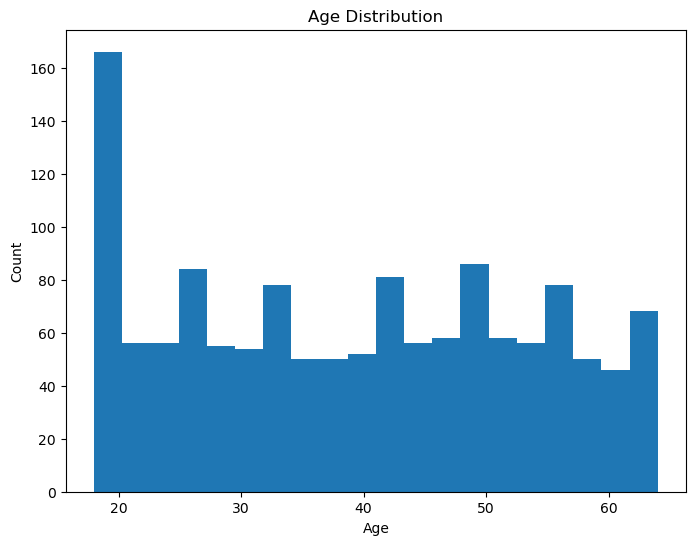

In [10]:
plt.figure(figsize = (8, 6))
plt.hist(df['age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

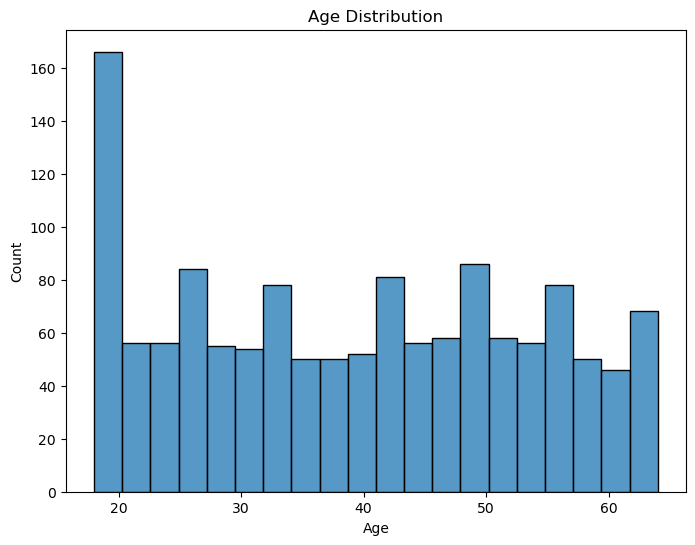

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

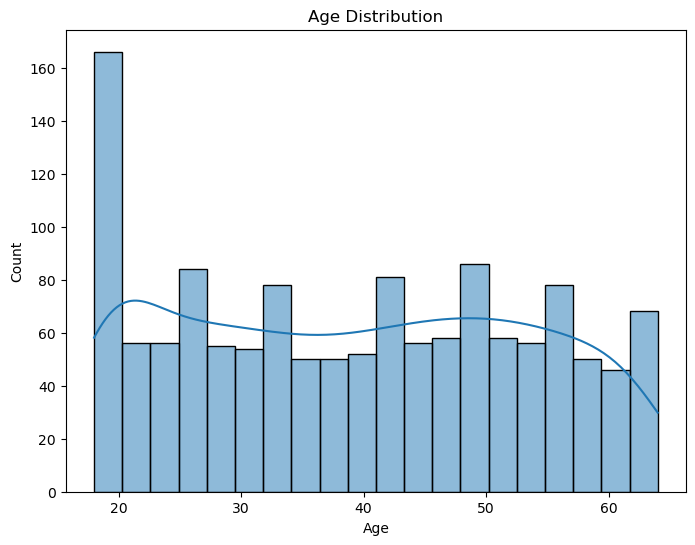

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# charges boxplot

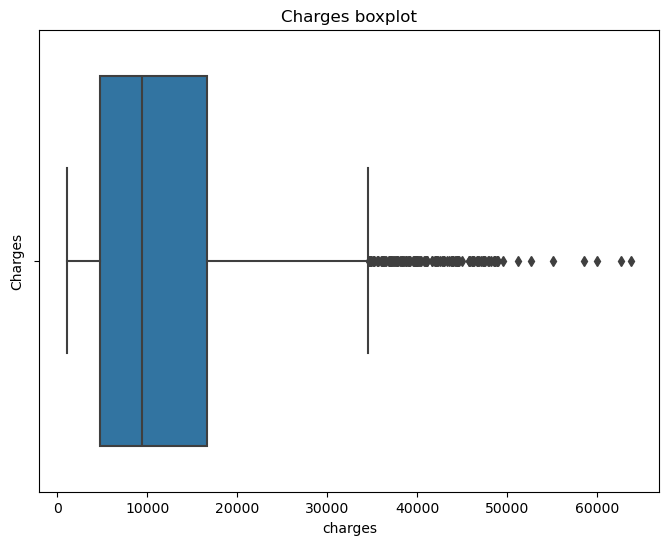

In [13]:
plt.figure(figsize = (8,6))
sns.boxplot(x ='charges', data = df)
plt.ylabel('Charges')
plt.title('Charges boxplot')
plt.show()

# detect outliers

In [15]:
def detect_outliers(column):
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column]<lower_bound) | (df[column] > upper_bound) ]
    return outliers

outliers_charges = detect_outliers('charges')
print((len(outliers_charges)))

139


# smoker count

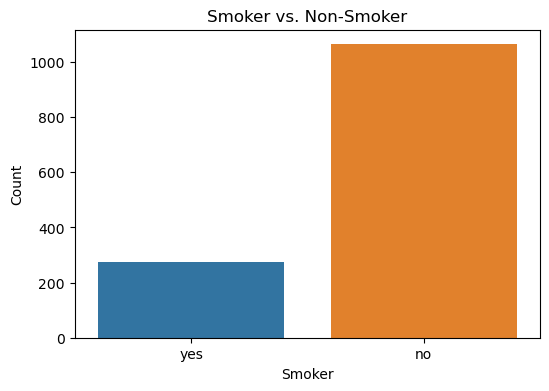

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data = df)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker vs. Non-Smoker')
plt.show()

# regions counts 

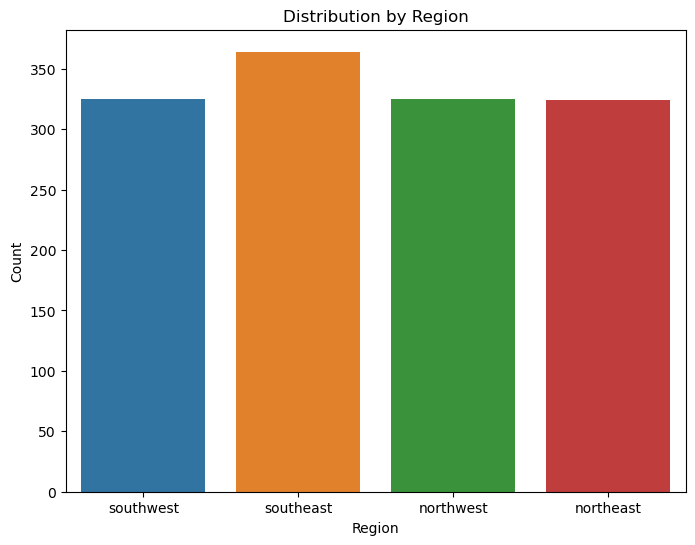

In [17]:
plt.figure(figsize = (8, 6))
sns.countplot(x='region', data = df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution by Region')
plt.show()

# Age vs charges

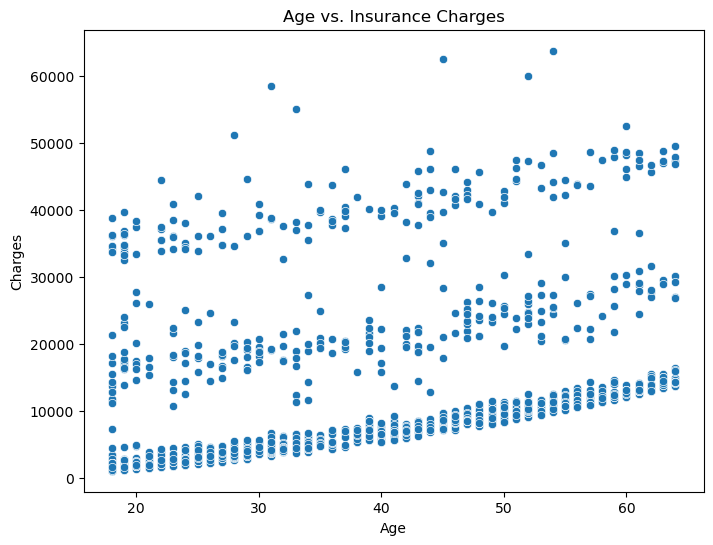

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Insurance Charges')
plt.show()

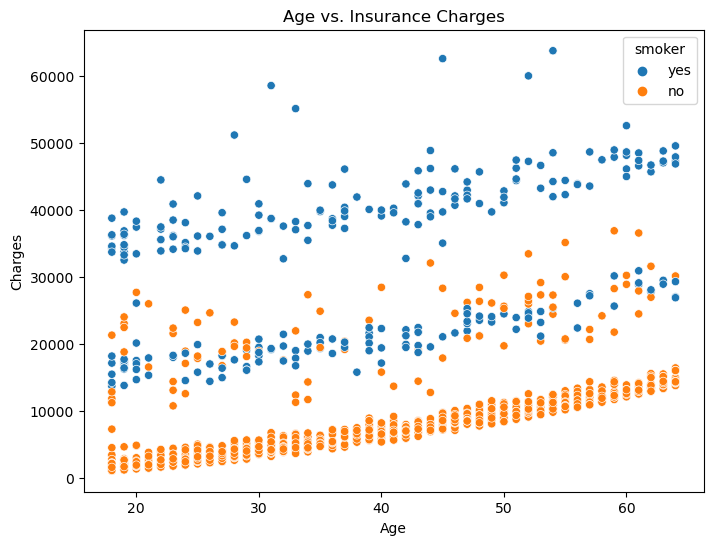

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Insurance Charges')
plt.show()

# BMI by sex boxpolt

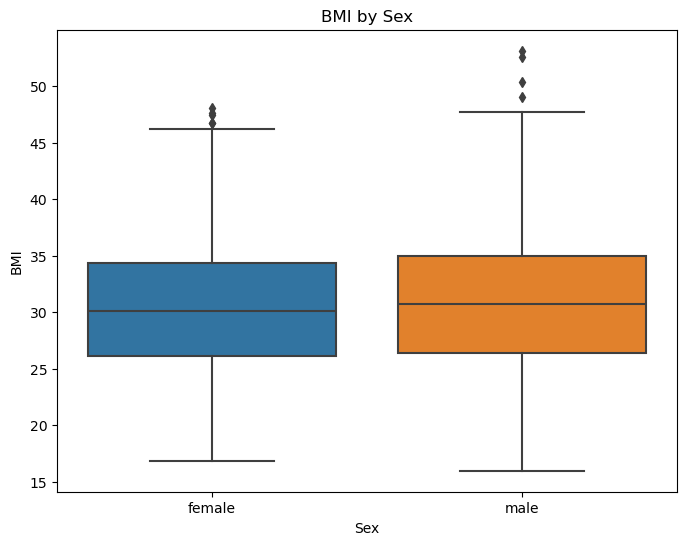

In [20]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,x = 'sex', y = 'bmi')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('BMI by Sex')
plt.show()

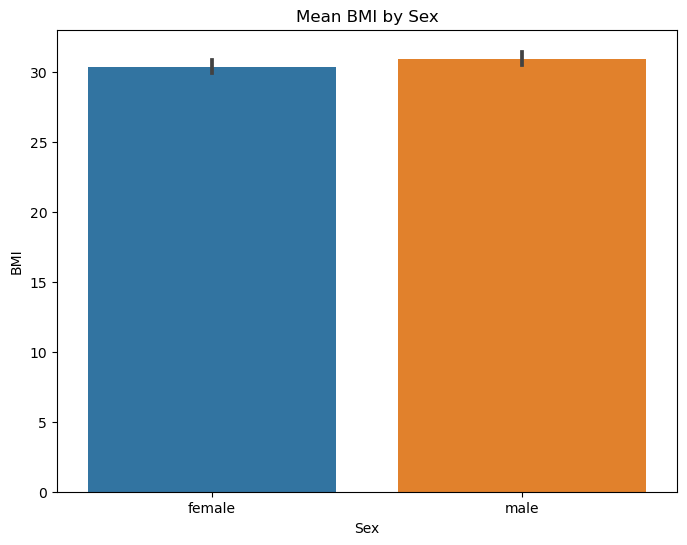

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data = df, x='sex', y='bmi')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('Mean BMI by Sex')
plt.show()

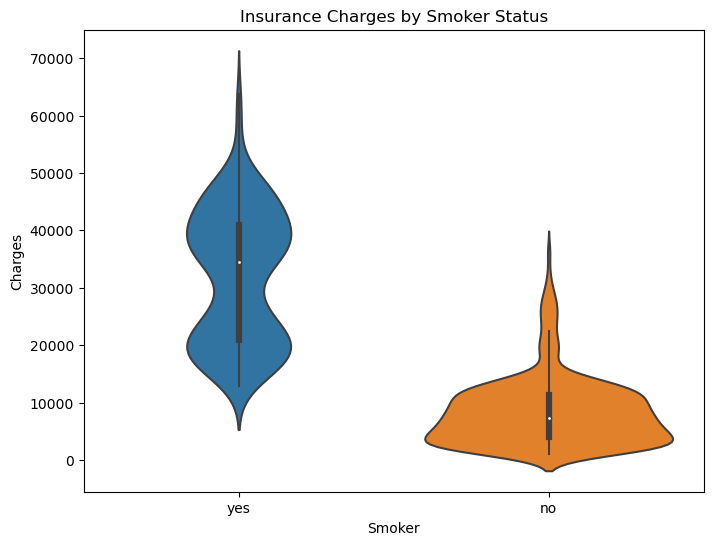

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(data = df,x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Insurance Charges by Smoker Status')
plt.show()

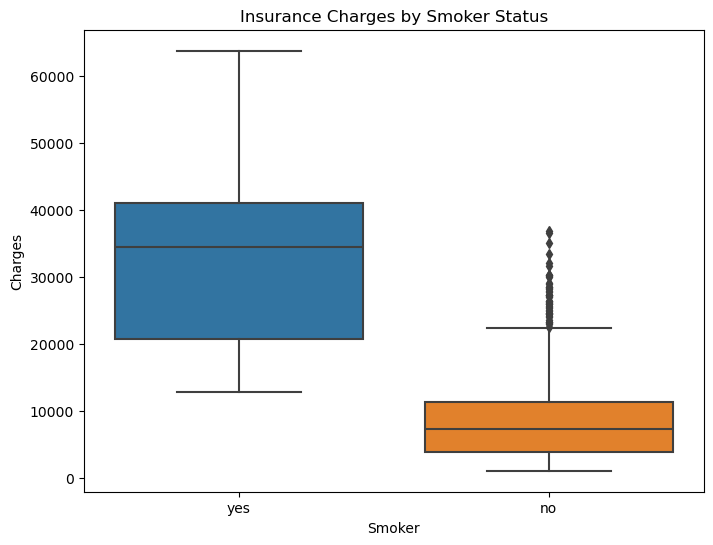

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Insurance Charges by Smoker Status')
plt.show()

# distribution of charges per region

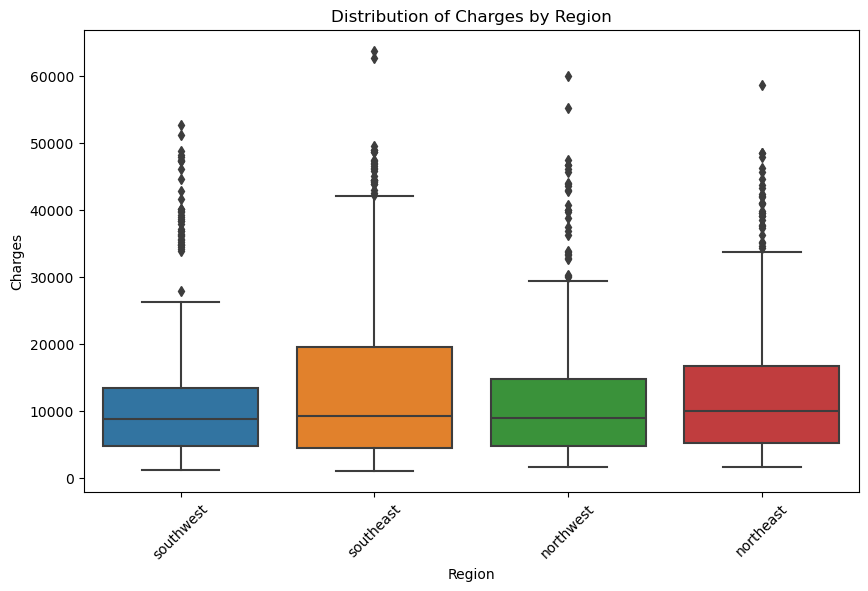

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df,x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Region')
plt.xticks(rotation=45)
plt.show()

# distribution of charges per gender

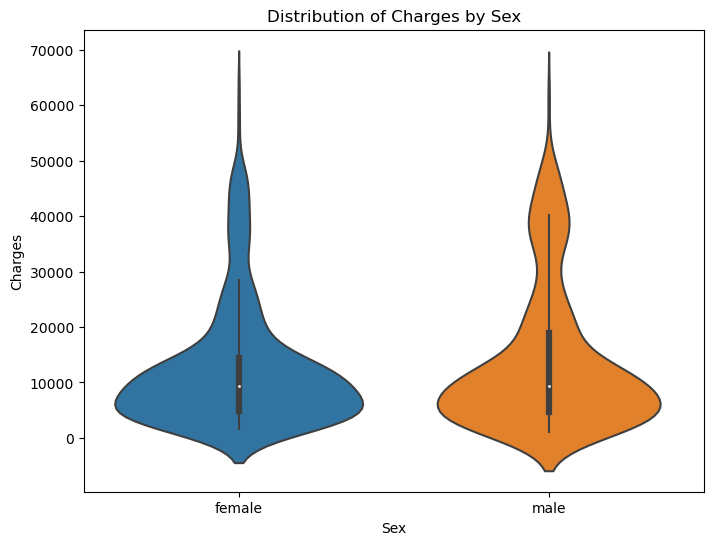

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Sex')
plt.show()

# heat map for numerical variables

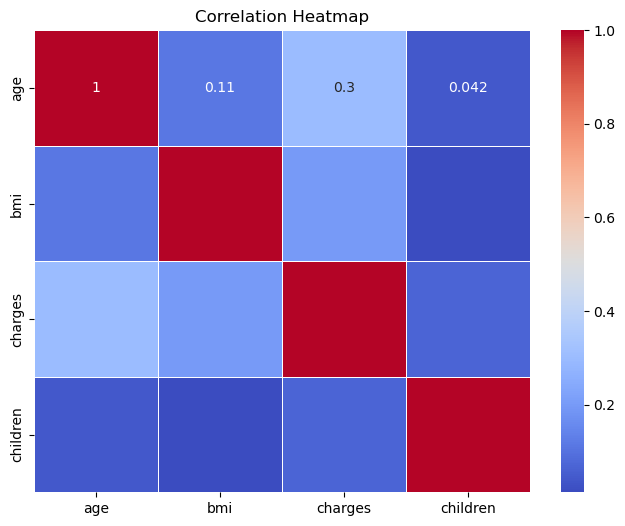

In [29]:
correlation_matrix = df[['age', 'bmi', 'charges', 'children']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# pair plot for numerical variables

<Figure size 640x480 with 0 Axes>

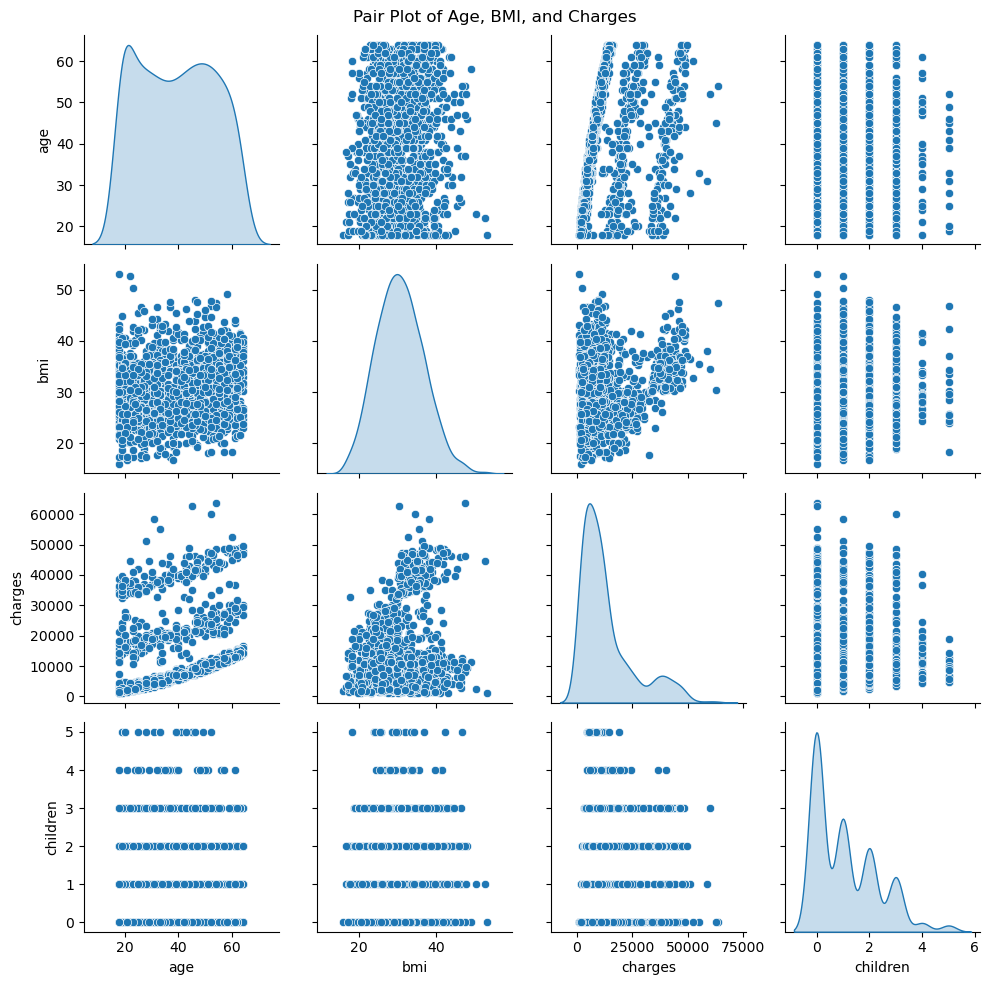

In [30]:
plt.tight_layout()
plt.show()
sns.pairplot(df[['age', 'bmi', 'charges', 'children']], diag_kind='kde')
plt.suptitle('Pair Plot of Age, BMI, and Charges')
plt.tight_layout()
plt.show()

# pair plot for numerical variables indicating smokers

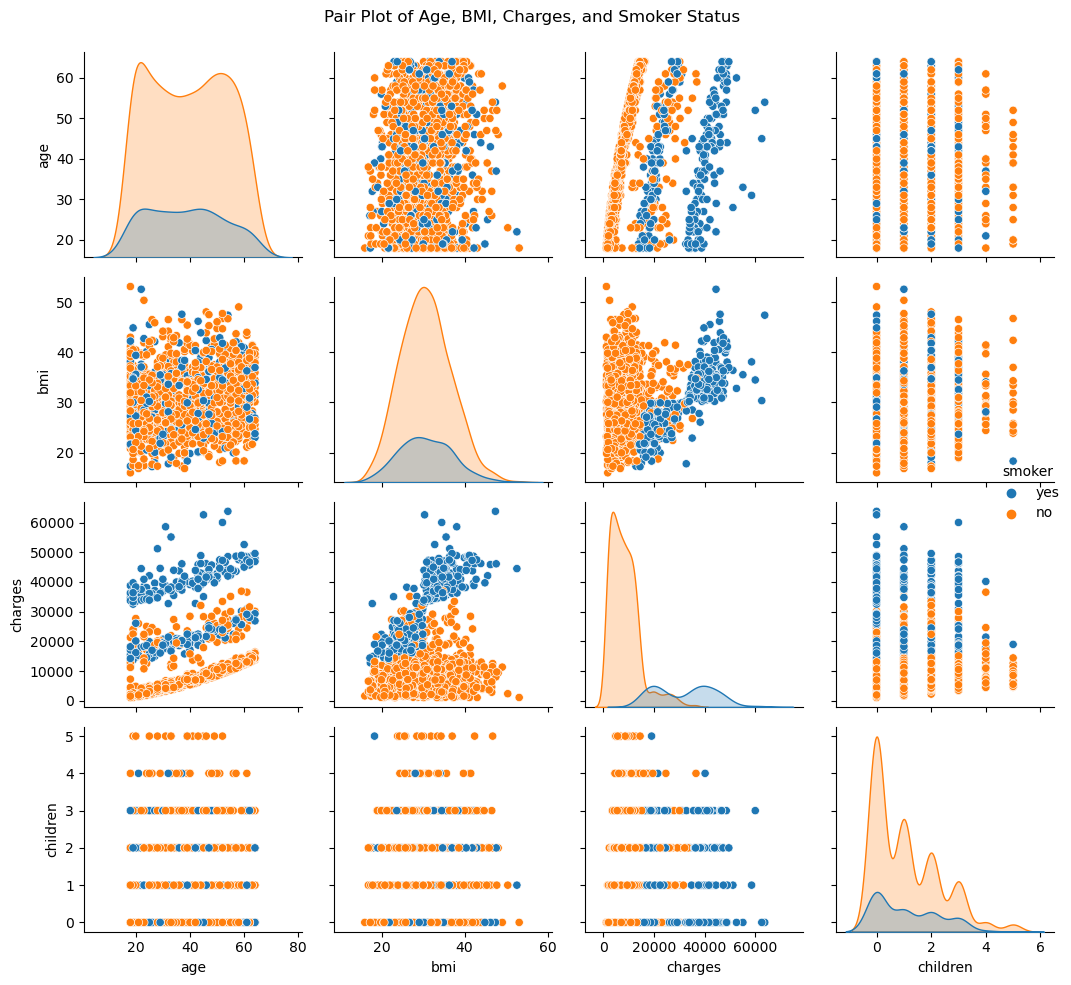

In [37]:


sns.pairplot(df[['age', 'bmi', 'charges', 'smoker', 'children']], hue='smoker')
plt.suptitle('Pair Plot of Age, BMI, Charges, and Smoker Status\n')

plt.tight_layout()

plt.show()